In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,auc,roc_auc_score, classification_report
%matplotlib inline

In [2]:
df= pd.read_csv("Desktop/creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


([<matplotlib.axis.XTick at 0x25617fe9e50>,
 [Text(0, 0, 'Genuine'), Text(1, 0, 'Fraud')])

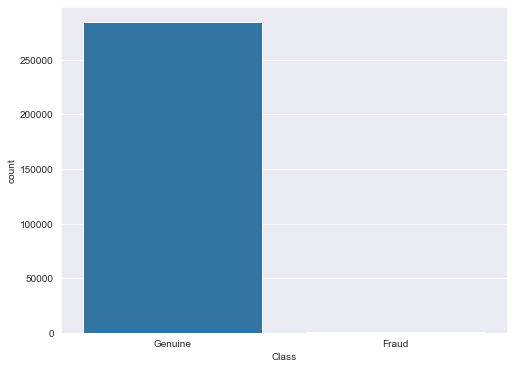

In [4]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x= 'Class', data= df)
Labels= ('Genuine', 'Fraud')
plt.xticks(range(2), Labels)

In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Time in between the transactions: 
0    0.000000
1    0.000000
2    0.000278
3    0.000278
4    0.000556
Name: Time_hr, dtype: float64


Text(0, 0.5, '# transactions')

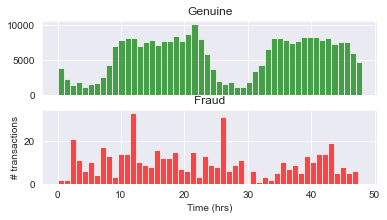

In [6]:
#plot Time to see if there is any trend

print("Time in between the transactions: ")
df['Time_hr'] = df['Time']/3600 # convert to hours
print(df['Time_hr'].head())
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6,3))
ax1.hist(df.Time_hr[df.Class==0],bins=50,color='g',alpha=0.7)
ax1.set_title('Genuine')
plt.xlabel('Time (hrs)')
plt.ylabel('# transactions')
ax2.hist(df.Time_hr[df.Class==1],bins=50,color='r',alpha=0.7)
ax2.set_title('Fraud')
plt.xlabel('Time (hrs)')
plt.ylabel('# transactions')

In [7]:
df = df.drop(['Time'],axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_hr
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000278
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000278
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000556


In [8]:
cols = df.columns.tolist()
cols.insert(0, cols.pop(cols.index('Time_hr')))
df = df.reindex(columns= cols)
df.head(10)

,Time_hr,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,0.000556,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,0.001111,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,0.001944,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,0.001944,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,0.002500,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


Text(0, 0.5, 'No. of transactions')

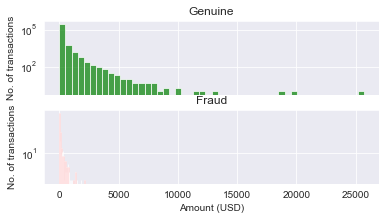

In [9]:
fig, (ax3,ax4) = plt.subplots(2,1, figsize = (6,3), sharex = True)
ax3.hist(df.Amount[df.Class==0],bins=50,color='g',alpha=0.7)
ax3.set_yscale('log') # to see the tails
ax3.set_title('Genuine') # to see the tails
ax3.set_ylabel('No. of transactions')
ax4.hist(df.Amount[df.Class==1],bins=50,color='r',alpha=0.7)
ax4.set_yscale('log') # to see the tails
ax4.set_title('Fraud') # to see the tails
ax4.set_xlabel('Amount (USD)')
ax4.set_ylabel('No. of transactions')

In [10]:
from sklearn.preprocessing import StandardScaler
df['scaled_Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = StandardScaler().fit_transform(df['Time_hr'].values.reshape(-1,1))
df = df.drop(['Amount', 'Time_hr'],axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_Amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [11]:
scaled_amount = df['scaled_Amount']
scaled_time = df['scaled_time']

df.drop(['scaled_Amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_Amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_Amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [12]:
def train_test_split(df, dropped_columns):
    df = df.drop(dropped_columns,axis=1)
    print(df.columns)
    
    from sklearn.model_selection import train_test_split
    
    y = df['Class']  #Labels
    X = df.drop(['Class'],axis= 1) #Variables
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 101)

    print("train set size: ", len(y_train), "\n test set size: ", len(y_test))
    print("fraud transactions in test set: ", sum(y_test))
    return X_train, X_test, y_train, y_test

In [13]:
def model_predictions(classifier, X_train, y_train, X_test):
    # create classifier
    classifier = classifier
    
    # fit it to training data
    classifier.fit(X_train,y_train)
    
    # predict using test data
    y_pred = classifier.predict(X_test)
    
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = classifier.predict_proba(X_test)
    
    return y_pred, y_pred_prob

In [14]:
def print_metrics(y_test,y_pred,y_pred_prob):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    print('Classification Report:\n', classification_report(y_test, y_pred))
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))

In [15]:
fraud_class_len = len(df[df['Class'] == 1])
print(fraud_class_len)

genuine_indices = df[df['Class'] == 0].index
print(genuine_indices)

# taking random 492 samples from the genuine class
random_genuine_samples = np.random.choice(genuine_indices, fraud_class_len, replace=False)
print(len(random_genuine_samples))

fraud_indices = df[df['Class'] == 1].index
print(fraud_indices)

492
Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            284797, 284798, 284799, 284800, 284801, 284802, 284803, 284804,
            284805, 284806],
           dtype='int64', length=284315)
492
Int64Index([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
              6338,   6427,
            ...
            274382, 274475, 275992, 276071, 276864, 279863, 280143, 280149,
            281144, 281674],
           dtype='int64', length=492)


In [16]:
undersample_indices = np.concatenate([random_genuine_samples,fraud_indices])
undersample_df = df.loc[undersample_indices]
undersample_df.head()

,scaled_Amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
78247,0.221695,-0.786953,-0.907832,-0.869342,1.085069,-1.124687,-0.135714,-1.674909,0.738808,-0.451542,...,0.145924,-0.218348,-0.214842,0.481729,0.937626,-0.604668,0.769396,0.104160,0.036263,0
140345,0.082002,-0.234645,-2.810614,-1.255934,0.534252,1.833196,1.266633,-0.336898,-0.524892,0.566502,...,0.058401,0.029318,0.150226,-0.861510,-0.163730,-0.210010,-0.245811,0.605932,-0.486416,0
30013,0.486369,-1.243994,-1.625940,-0.110647,2.306246,0.225376,-0.623481,0.657943,1.087035,-0.073488,...,-0.263984,0.086506,0.622745,0.020637,-0.017942,0.588886,-0.353131,-0.261184,-0.092740,0
61951,-0.173316,-0.942381,1.044447,-0.068802,1.289656,1.221280,-1.010371,-0.215310,-0.574621,0.167020,...,-0.044216,0.190024,0.452668,-0.025004,0.533390,0.262583,-0.395167,0.050317,0.038950,0
89968,-0.293298,-0.673872,1.205345,-0.294307,-0.172586,-0.021268,1.406189,3.944829,-1.303069,1.087584,...,0.036542,0.204390,0.491523,-0.112468,1.013998,0.528378,-0.240060,0.078306,0.038132,0


([<matplotlib.axis.XTick at 0x256191283a0>,
 [Text(0, 0, 'Genuine'), Text(1, 0, 'Fraud')])

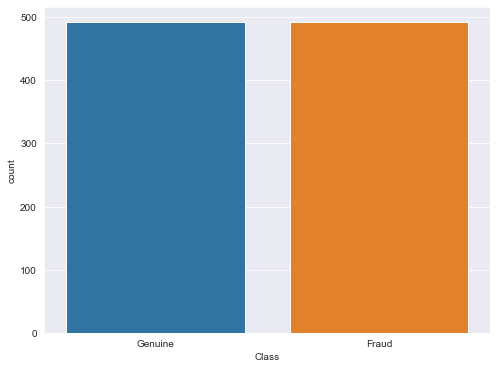

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x= 'Class', data= undersample_df)
Labels= ('Genuine', 'Fraud')
plt.xticks(range(2), Labels)

In [20]:
from xgboost import XGBClassifier
dropped_columns = []
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(undersample_df, dropped_columns)
new_y_pred, new_y_pred_prob = model_predictions(XGBClassifier(), new_X_train, new_y_train, new_X_test)
print_metrics(new_y_test,new_y_pred,new_y_pred_prob)

Index(['scaled_Amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
       'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
       'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28', 'Class'],
      dtype='object')
train set size:  738 
 test set size:  246
fraud transactions in test set:  118
test-set confusion matrix:
 [[127   1]
 [  8 110]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       128
           1       0.99      0.93      0.96       118

    accuracy                           0.96       246
   macro avg       0.97      0.96      0.96       246
weighted avg       0.96      0.96      0.96       246

ROC AUC: 0.9878840042372882


In [21]:
dropped_columns = ['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V10','V9','V8']
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(undersample_df, dropped_columns)
new_y_pred, new_y_pred_prob = model_predictions(XGBClassifier(), new_X_train, new_y_train, new_X_test)
print_metrics(new_y_test,new_y_pred,new_y_pred_prob)

Index(['scaled_Amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
       'V7', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class'],
      dtype='object')
train set size:  738 
 test set size:  246
fraud transactions in test set:  118
test-set confusion matrix:
 [[122   6]
 [  8 110]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       128
           1       0.95      0.93      0.94       118

    accuracy                           0.94       246
   macro avg       0.94      0.94      0.94       246
weighted avg       0.94      0.94      0.94       246

ROC AUC: 0.9810646186440678


In [19]:
from xgboost import XGBClassifier
dropped_columns = []
X_train, X_test, y_train, y_test = train_test_split(df, dropped_columns)
y_pred, y_pred_prob = model_predictions(XGBClassifier(), X_train, y_train, X_test)
print_metrics(y_test,y_pred,y_pred_prob)

Index(['scaled_Amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
       'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
       'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28', 'Class'],
      dtype='object')
train set size:  213605 
 test set size:  71202
fraud transactions in test set:  125
test-set confusion matrix:
 [[71070     7]
 [   24   101]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71077
           1       0.94      0.81      0.87       125

    accuracy                           1.00     71202
   macro avg       0.97      0.90      0.93     71202
weighted avg       1.00      1.00      1.00     71202

ROC AUC: 0.978640291514836


In [22]:
#with dropping columns
dropped_columns = ['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V10','V9','V8']
X_train, X_test, y_train, y_test = train_test_split(df, dropped_columns)
y_pred, y_pred_prob = model_predictions(XGBClassifier(), X_train, y_train, X_test)
print_metrics(y_test,y_pred,y_pred_prob)

Index(['scaled_Amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
       'V7', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class'],
      dtype='object')
train set size:  213605 
 test set size:  71202
fraud transactions in test set:  125
test-set confusion matrix:
 [[71070     7]
 [   23   102]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71077
           1       0.94      0.82      0.87       125

    accuracy                           1.00     71202
   macro avg       0.97      0.91      0.94     71202
weighted avg       1.00      1.00      1.00     71202

ROC AUC: 0.9761596015588727
